# Algorithm 7 Data Combiner / Dimension Reducer

In [2]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

SETUP

231 patches created with algorithm 7 loaded.
                                 0         0.1        0.2        0.3  \
Frequency                                                              
01 - Introduction_1.wav   0.000000    0.155585   0.181718   0.204740   
01 - Introduction_3.wav   2.887008    4.359714   1.014037   1.452763   
01 - Konami Music_0.wav  10.048917  191.869320  91.487510  13.409108   
01 - Konami Music_1.wav   0.046697    1.849770   4.793641   0.111607   
01 - Storyline_0.wav      8.807012  192.985410  89.900360  12.688002   

                                0.4        0.5        0.6         0.7  \
Frequency                                                               
01 - Introduction_1.wav    1.115037   0.900316  10.134888    6.486223   
01 - Introduction_3.wav    4.167890   1.092701   0.452560    5.342824   
01 - Konami Music_0.wav  147.273590  82.207920   5.908643  111.634540   
01 - Konami Music_1.wav    3.710269   3.479036   0.052593    3.349345   
01 - Storyli

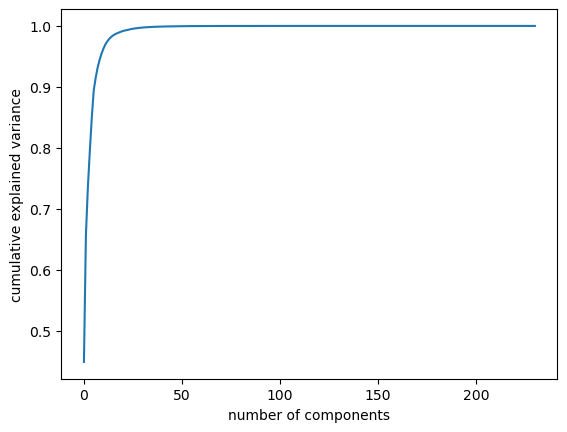

In [18]:
#open directory with the spectrograms and audio data.
used_raw_data = False

os.chdir('..')
os.chdir('./data/')

SampleFeatures = pd.read_csv('SampleSpectra7.csv', index_col = 0).drop('Time') # No longer need the Time subcolumn names, as the main column labels incorporated this info just fine.
SampleFeatures['116.204'] = SampleFeatures['116.204'].fillna(0) # For some reason, the last column had NaNs near the bottom.

if used_raw_data:
    SampleWav = pd.read_csv('SampleWav7.csv', index_col = 0)
    SampleFeatures = pd.concat([SampleFeatures, SampleWav], axis = 1, join = 'inner')
    del SampleWav

print(len(SampleFeatures),'patches created with algorithm 7 loaded.')
print(SampleFeatures.head())

print(SampleFeatures.isnull().values.any())
pca = PCA(n_components = 231) # Has to be <= min(# samples, # features)
pca.fit(SampleFeatures)
ReducedFeatures = pca.transform(SampleFeatures)
print(pca.explained_variance_)
print('reduced shape ', ReducedFeatures.shape)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

SAVING THIS PCA TO DISK